## Logistic Regression with TensorFlow
We will be focusing on running logistic regression using TensorFlow in this exercise. We will train the model in batches.
The second exercise will be of two layer network and will build upon this exerercise with a few changes

## 1. Load necessary libraries
Loading libraries, rading data, and having a look at the data

In [1]:
import numpy as np # linear algebra
import seaborn as sns
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from subprocess import check_output

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
## column one is id column and we don't need it
#TO DO: import the dataset without the first columns


In [3]:
print(iris.shape)
print(iris.head())

(150, 5)
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa


## 2. Binary classification
Iris dataset has 3 classes, to make it binary, we will focus only on classification using two classes setosa and versicolor. These are present as first 100 rows in iris dataframe so we just select them as such

In [4]:
iris = iris[:100]
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Converting species type to binary encoding 

In [5]:
## Color mapping categories
iris.Species = iris.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor'], value=[0, 1])

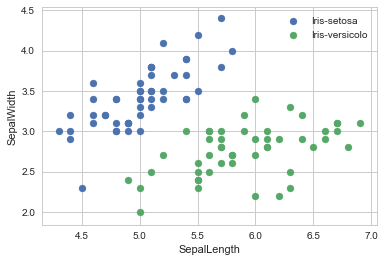

In [6]:
## Plotting sepal width vs sepal length for both iris species
plt.scatter(iris[:50].SepalLengthCm, iris[:50].SepalWidthCm, label='Iris-setosa')
plt.scatter(iris[51:].SepalLengthCm, iris[51:].SepalWidthCm, label='Iris-versicolo')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc='best')


## 2.1 Prepare features
Here we extract our features and output variable seperately

In [7]:
## Prepare features and output variable. 
FEATURES = iris.columns[0:4]
X = iris[FEATURES].as_matrix()
Y = iris.Species.values

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## 3. Split data

In [8]:
# Train test split 80%, 20%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)

## another way to do split
#train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)
# diff set
#test_index = np.array(list(set(range(len(X))) - set(train_index)))
#X_train = X[train_index]
#train_y = y[train_index]
#test_X = X[test_index]
#test_y = y[test_index]


(70, 4)
(30, 4)


## 4. Normalize data

In [9]:
# TO DO: Normalize the dataset
# For simplicity we use min, max normalization. Defining a function for that



In [10]:
# Normalized processing, must be placed after the data set segmentation, 
# otherwise the test set will be affected by the training set
X_train = min_max_normalized(X_train)
X_test = min_max_normalized(X_test)


## 5. Building the model framework

# 5.1 Model parameters
Model parameters like learning rate, number of epochs is define here

In [11]:
# TO DO: Define the learning rate， batch_size etc.
learning_rate = 
batch_size = 
training_epochs = 
n_input = X_train.shape[1] # input shape (105, 4)

## 5.2 Define placeholders, and intialize weights
Pleaseholders are (you can think of them as something like empty variables) used to supply data arguements
when running a model in TF. We define here two placeholders one for data (i.e. features) and second for target (i.e.) output variable.

Along with that we intialize weights by performing sampling from a random normal distribution. In logistic regression the number of weights is equal to the number of features in the data

In [12]:
#TO DO: Define the shape
data = tf.placeholder(dtype=tf.float32, shape=[None, ???])
target = tf.placeholder(dtype=tf.float32, shape=[None, ??? ])

# Begin building the model framework
# Declare the variables that need to be learned and initialization
# W is for weights and b for bias. Since we have 4 features (we need for weights) and similarly one bias
W = tf.Variable(tf.random_normal(shape=[n_input, 1]))
#TO DO: initialize the bias
b = ???
init = tf.global_variables_initializer()



## 5.3 Creating a tensorflow session and initializing it
It is very imporant to understand sessions in TF. 
https://www.tensorflow.org/guide/graphs

In [13]:
#TO DO: Create and initialize a tensorflow session


## 5.4 Creating a model, defining loss and optimization

- Here we create a simple linear model that basically multiplies our features with weights and adds biases. 
- Once the model has been defined, we have to create our loss function (or cost, how ever you want to call it). Please look at  TF help manual at https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits to look at different loss functions available
- We also define the kind of optimization we should run. We use gradient descent optimization. There are seveal optimization methods available in TF
https://www.tensorflow.org/api_docs/python/tf/train/Optimizer
- Last but not least, what is our goal? Minimize loss. 

In [14]:
# Declare the model you need to learn

#TO DO: assign the argument to the matrix multiplication function
mod = tf.matmul(???, ???) + b

# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

#TO DO: Fill in the arguments
# Define the optimizer, optimizer needs an argument, which one is it? 
opt = tf.train.GradientDescentOptimizer( ???)
# here we define the goal i.e. what do we want to optimize and how. How has been defined in opt above
goal = opt.minimize( ???)

## 5.5 Model Testing
Define predictions (which are bascially sigmoid of mod, rounded), check which predictions are correct, get accuracy

In [15]:
#TO DO: Fill in the correct arguments

# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid( ??? ))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework


## 6. Running the model

In [16]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []


In [18]:
# training model
for epoch in range(training_epochs):
    # Generate random batch index
    batch_index = np.random.choice(len(X_train), size=batch_size)
    batch_train_X = X_train[batch_index]
    batch_train_y = np.matrix(y_train[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: np.matrix(y_train).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: np.matrix(y_test).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))

epoch:  300 loss: 0.794298 train_acc: 0.400000 test_acc: 0.300000
epoch:  600 loss: 0.707075 train_acc: 0.471429 test_acc: 0.466667
epoch:  900 loss: 0.668546 train_acc: 0.500000 test_acc: 0.533333


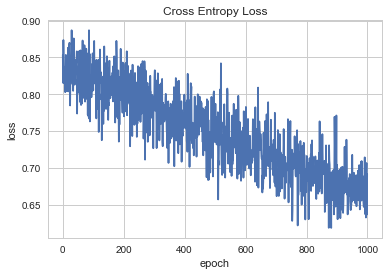

In [19]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

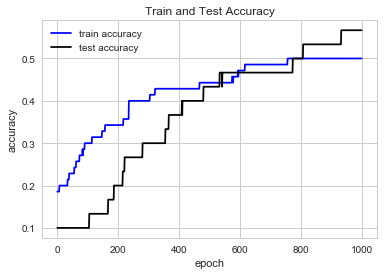

In [20]:
# accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()
